# Distribution of unique key

In this section, the distribution of unique key like `subject_id` and `patient_id` are analyzed across all datasets.

```mermaid
flowchart LR
a --> b
```



In [1]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from utils.helpers import find_csvs, get_indexes

In [2]:
data_filepath = "../rawdata/"
csv_files = find_csvs(data_filepath)


def get_unique_id(unique_key,files):
    res_df = []

    for file in files:
        
        df = pd.read_csv(file)
        
        if unique_key in df.columns:
            temp = df[unique_key].to_list()
            res_df.extend(temp)
    
    return res_df

unique_column = "subject_id"
# unique_column = "patient_id"

res_df = get_unique_id(unique_column,csv_files)

/var/folders/g9/k6qb06vj6177d3v18ms7g0tw0000gn/T/ipykernel_3273/1914333538.py:10: DtypeWarning: Columns (17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/g9/k6qb06vj6177d3v18ms7g0tw0000gn/T/ipykernel_3273/1914333538.py:10: DtypeWarning: Columns (8,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/g9/k6qb06vj6177d3v18ms7g0tw0000gn/T/ipykernel_3273/1914333538.py:10: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/g9/k6qb06vj6177d3v18ms7g0tw0000gn/T/ipykernel_3273/1914333538.py:10: DtypeWarning: Columns (4,6,7,8,9,10,11,12,13,15,16,17,18,21,23,24,25,26,27,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


Now, we need to check the distribution by looking at `subject_id`.

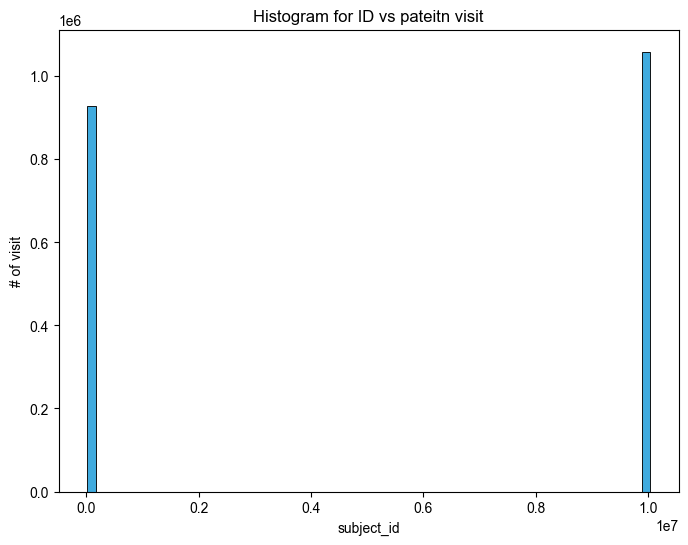

In [3]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram
sns.histplot(res_df, ax=ax, kde=False, color="#008fd5")

# Add labels and title
ax.set_xlabel(unique_column)
ax.set_ylabel('# of visit')
ax.set_title('Histogram for ID vs pateitn visit')

# Customize the style
sns.set_style("darkgrid")
sns.set_palette("husl")

# Show the plot
plt.show()


From the graph above, we can safely say that it has at least two naming conventaion for the unique identifier for patient. One is ranging at a lower bound while another is ranging from a higher bound.
```mermaid
flowchart TD
a(subject_id) --> b(1e4) & c(1e7)
```

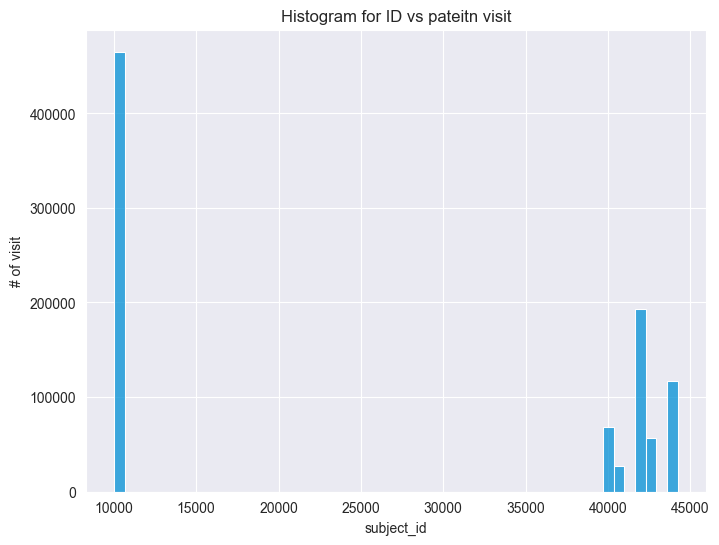

In [8]:

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram
sns.histplot([x for x in res_df if x < 5e6], ax=ax, kde=False, color="#008fd5")

# Add labels and title
ax.set_xlabel(unique_column)
ax.set_ylabel('# of visit')
ax.set_title('Histogram for ID vs pateitn visit')

# Customize the style
sns.set_style("darkgrid")
sns.set_palette("husl")

# Show the plot
plt.show()

It looks like we can subdivide the first range

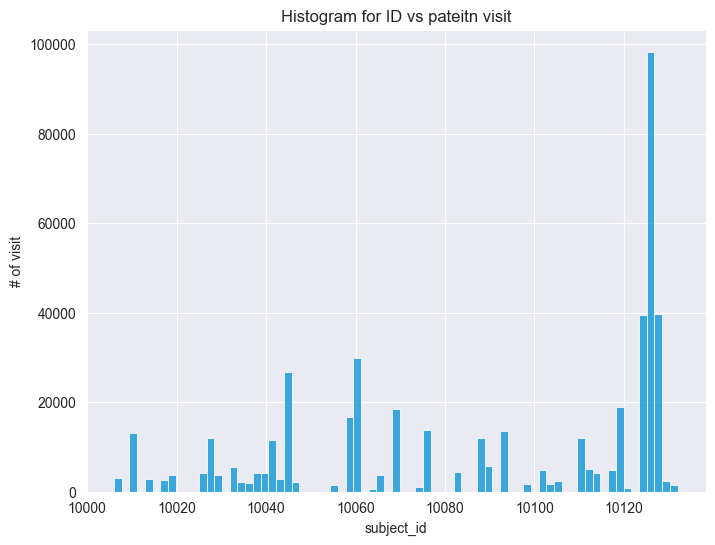

In [9]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram
sns.histplot([x for x in res_df if x < 15000], ax=ax, kde=False, color="#008fd5")

# Add labels and title
ax.set_xlabel(unique_column)
ax.set_ylabel('# of visit')
ax.set_title('Histogram for ID vs pateitn visit')

# Customize the style
sns.set_style("darkgrid")
sns.set_palette("husl")

# Show the plot
plt.show()

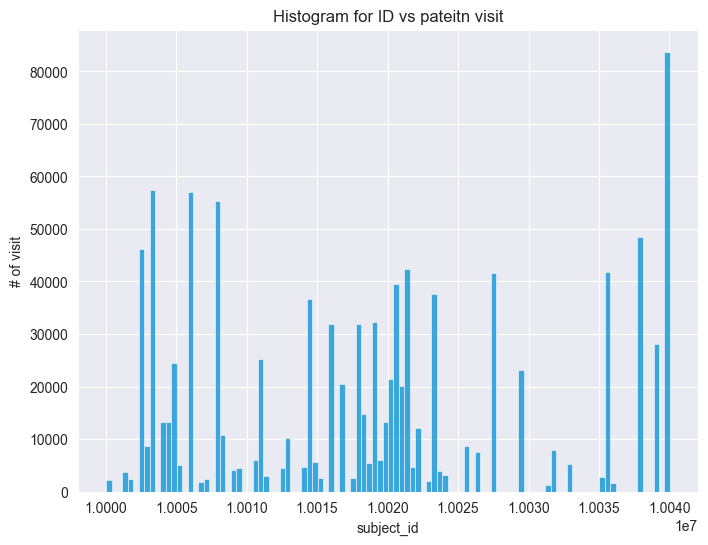

In [57]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram
sns.histplot([x for x in res_df if x >= 5e6], ax=ax, kde=False, color="#008fd5")

# Add labels and title
ax.set_xlabel(unique_column)
ax.set_ylabel('# of visit')
ax.set_title('Histogram for ID vs pateitn visit')

# Customize the style
sns.set_style("darkgrid")
sns.set_palette("husl")

# Show the plot
plt.show()

# Summary

The result has been summarized in the [diagram here](../drawings/2_subject_id_distro.excalidraw). Feel free to inspect.